<a href="https://colab.research.google.com/github/liepstik/semi_supervised_learning_MNIST/blob/master/CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (avec Keras)

In [1]:
##### CNN sur touts les labels ########

## Imports 

In [2]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist 
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Construction du modèle

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu",
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# pour passer d'un tenseur (3D) a un vecteur (1D)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
# on veut une classification a 10 classes
model.add(layers.Dense(10, activation="softmax")) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Chargement des données MNIST


In [15]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

Xtrain = Xtrain.reshape((60000, 28,28,1))
Xtrain = Xtrain.astype("float32")/255

Xtest = Xtest.reshape((10000, 28,28,1))
Xtest = Xtest.astype("float32")/255

Ytrain = to_categorical(Ytrain)
#Ytest = to_categorical(Ytest)

### Application du modèle

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(Xtrain, Ytrain, epochs=50, batch_size=64, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 17s 410us/step - loss: 0.2413 - accuracy: 0.9285 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 2/50
42000/42000 [==============================] - 18s 434us/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0629 - val_accuracy: 0.9807
Epoch 3/50
42000/42000 [==============================] - 16s 390us/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 4/50
42000/42000 [==============================] - 16s 370us/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0597 - val_accuracy: 0.9814
Epoch 5/50
42000/42000 [==============================] - 16s 387us/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0471 - val_accuracy: 0.9863
Epoch 6/50
42000/42000 [==============================] - 16s 387us/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0444 - val_accuracy: 0.9866
Epoch 7/50
42000/42000 [==============================] 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Evaluation du modèle

In [17]:
test_loss, test_acc = model.evaluate(Xtest, Ytest)

In [9]:
test_acc

0.991100013256073

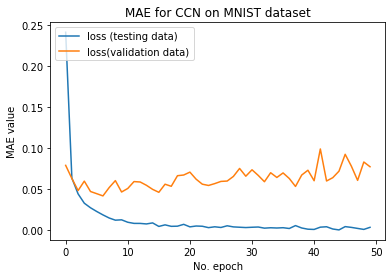

In [18]:
# Plot history: Loss
plt.plot(history.history['loss'], label='loss (testing data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('MAE for CCN on MNIST dataset')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

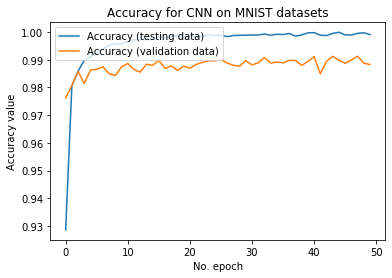

In [19]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], 
         label='Accuracy (testing data)')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy (validation data)')
plt.title('Accuracy for CNN on MNIST datasets')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [40]:
##### CNN entrainer sur 100 labels ########

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.utils import shuffle

In [42]:
x, y = shuffle(Xtrain, Ytrain, random_state=15)
x_train = x[0:100]
y_train = y[0:100]

In [43]:
model_semi = Sequential()
#add   Conv2D   Activation  MaxPooling2D Dropout 
model_semi.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_semi.add(Activation('relu'))
model_semi.add(Conv2D(32, (3, 3)))
model_semi.add(Activation('relu'))
model_semi.add(MaxPooling2D(pool_size=(2, 2)))
model_semi.add(Dropout(0.25))

model_semi.add(Conv2D(64, (3, 3), padding='same'))
model_semi.add(Activation('relu'))
model_semi.add(Conv2D(64, (3, 3)))
model_semi.add(Activation('relu'))
model_semi.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model_semi.add(Flatten())
model_semi.add(Dense(512))
model_semi.add(Activation('relu'))
model_semi.add(Dropout(0.5))
model_semi.add(Dense(10))
model_semi.add(Activation('softmax'))

In [47]:
model_semi.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model_semi.fit(x_train, y_train, epochs=100, batch_size=64,  validation_data=(Xtest, Ytest))

Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.7231 - val_accuracy: 0.8837
Epoch 2/100
100/100 [==============================] - 3s 30ms/step - loss: 3.1315e-04 - accuracy: 1.0000 - val_loss: 0.9559 - val_accuracy: 0.8581
Epoch 3/100
100/100 [==============================] - 3s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9676 - val_accuracy: 0.8642
Epoch 4/100
100/100 [==============================] - 3s 30ms/step - loss: 0.0138 - accuracy: 0.9900 - val_loss: 0.8245 - val_accuracy: 0.8844
Epoch 5/100
100/100 [==============================] - 3s 30ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.9052 - val_accuracy: 0.8763
Epoch 6/100
100/100 [==============================] - 3s 30ms/step - loss: 7.0905e-04 - accuracy: 1.0000 - val_loss: 1.0435 - val_accuracy: 0.8622
Epoch 7/100
100/100 [==============================] - 3s 30ms/step - loss: 0.00

Epoch 57/100
100/100 [==============================] - 3s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.0444 - val_accuracy: 0.8627
Epoch 58/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.1266 - val_accuracy: 0.8546
Epoch 59/100
100/100 [==============================] - 4s 40ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0768 - val_accuracy: 0.8592
Epoch 60/100
100/100 [==============================] - 3s 34ms/step - loss: 0.0162 - accuracy: 0.9900 - val_loss: 0.9839 - val_accuracy: 0.8713
Epoch 61/100
100/100 [==============================] - 3s 31ms/step - loss: 4.1781e-04 - accuracy: 1.0000 - val_loss: 0.9762 - val_accuracy: 0.8696
Epoch 62/100
100/100 [==============================] - 3s 31ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.9783 - val_accuracy: 0.8717
Epoch 63/100
100/100 [==============================] - 3s 31ms/step - loss: 0.0202 - accuracy: 0.9900 - val_loss: 0.9341 - va

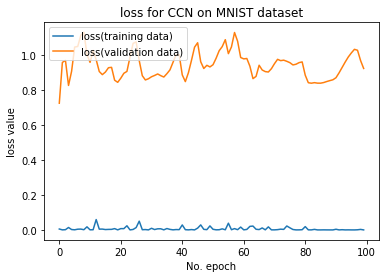

In [50]:
# Plot history: Loss
plt.plot(history.history['loss'], label='loss(training data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('loss for CCN on MNIST dataset')
plt.ylabel('loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

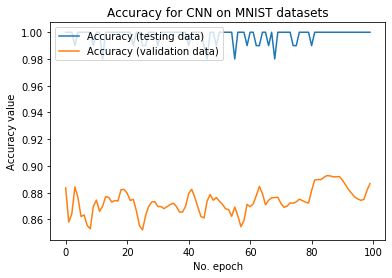

In [49]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], 
         label='Accuracy (testing data)')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy (validation data)')
plt.title('Accuracy for CNN on MNIST datasets')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [51]:
test_loss, test_acc = model_semi.evaluate(Xtest, Ytest)
test_acc

10000/10000 [==============================] - 3s 339us/step


0.8867999911308289

In [30]:
test_loss, test_acc = model_semi.evaluate(Xtest, Ytest)
test_acc

10000/10000 [==============================] - 2s 218us/step


0.8364999890327454

In [31]:
## Entrainment de CNN avec 100 labels et rajouter des images (data augmentation)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )

datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(x_train, y_train, batch_size=60, subset='validation')


# fits the model on batches with real-time data augmentation:
history = model_semi.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 300,
                    workers=-1)

Epoch 1/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 86ms/step - loss: 2.1408 - accuracy: 0.9000 - val_loss: 2.4277e-05 - val_acc

Epoch 10/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 39ms/step - loss: 0.2275 - accuracy: 0.9500 - val_loss: 0.0437 - val_accura

Epoch 19/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 83ms/step - loss: 0.0842 - accuracy: 0.9833 - val_loss: 0.1842 - val_accura

Epoch 28/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 38ms/step - loss: 0.1036 - accuracy: 0.9500 - val_loss: 0.1268 - val_accura

Epoch 37/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 73ms/step - loss: 0.0657 - accuracy: 0.9833 - val_loss: 0.2056 - val_accura

Epoch 46/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 41ms/step - loss: 0.2740 - accuracy: 0.9000 - val_loss: 0.3694 - val_accura

Epoch 55/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 77ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.5942 - val_accura

Epoch 64/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 41ms/step - loss: 9.1014e-04 - accuracy: 1.0000 - val_loss: 0.3299 - val_ac

Epoch 73/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 74ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.3820 - val_accura

Epoch 82/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 36ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4283 - val_accura

Epoch 91/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 74ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3524 - val_accura

Epoch 100/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 45ms/step - loss: 5.3692e-04 - accuracy: 1.0000 - val_loss: 0.2924 - val_a

Epoch 109/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 76ms/step - loss: 9.0834e-04 - accuracy: 1.0000 - val_loss: 0.4070 - val_a

Epoch 118/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 42ms/step - loss: 4.6616e-04 - accuracy: 1.0000 - val_loss: 0.3576 - val_a

Epoch 127/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 74ms/step - loss: 5.8998e-04 - accuracy: 1.0000 - val_loss: 0.5926 - val_a

Epoch 136/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 41ms/step - loss: 1.0748e-04 - accuracy: 1.0000 - val_loss: 0.2326 - val_a

Epoch 145/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 83ms/step - loss: 4.2258e-04 - accuracy: 1.0000 - val_loss: 0.4135 - val_a

Epoch 154/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 38ms/step - loss: 6.1859e-04 - accuracy: 1.0000 - val_loss: 0.4796 - val_a

Epoch 163/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 76ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.2664 - val_accur

Epoch 172/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 36ms/step - loss: 1.4750e-04 - accuracy: 1.0000 - val_loss: 0.6206 - val_a

Epoch 181/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 74ms/step - loss: 8.9312e-05 - accuracy: 1.0000 - val_loss: 0.0816 - val_a

Epoch 190/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 39ms/step - loss: 6.0239e-05 - accuracy: 1.0000 - val_loss: 0.3467 - val_a

Epoch 199/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 74ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.6882 - val_accur

Epoch 208/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 41ms/step - loss: 2.5598e-05 - accuracy: 1.0000 - val_loss: 0.3073 - val_a

Epoch 217/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 78ms/step - loss: 0.0443 - accuracy: 0.9833 - val_loss: 0.3705 - val_accur

Epoch 226/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 44ms/step - loss: 9.1355e-04 - accuracy: 1.0000 - val_loss: 0.3909 - val_a

Epoch 235/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 77ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0773 - val_accur

Epoch 244/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 44ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3427 - val_accur

Epoch 253/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 77ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0292 - val_accur

Epoch 262/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 43ms/step - loss: 1.2837e-04 - accuracy: 1.0000 - val_loss: 0.1642 - val_a

Epoch 271/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 73ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1384 - val_accur

Epoch 280/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 40ms/step - loss: 8.8285e-04 - accuracy: 1.0000 - val_loss: 0.0743 - val_a

Epoch 289/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 73ms/step - loss: 3.4790e-04 - accuracy: 1.0000 - val_loss: 0.4880 - val_a

Epoch 298/300
1/0 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 42ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4656 - val_accur

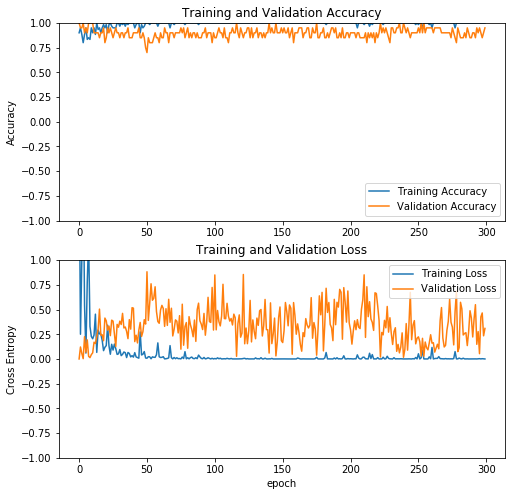

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
# model.fit(X_train, y_train, epochs= 32 , batch_size=200, validation_split = 0.2)
scores =model_semi.evaluate(Xtest, Ytest, verbose = 10 )
print(scores)

[0.3296712793290615, 0.8978999853134155]
